In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("../data/world_bank_development_indicators.csv")

# Fix date column
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Extract year
df["year"] = df["date"].dt.year

# Check that year exists now
print(df[["date", "year"]].head())


        date  year
0 1960-01-01  1960
1 1961-01-01  1961
2 1962-01-01  1962
3 1963-01-01  1963
4 1964-01-01  1964


In [5]:
df_year=df[df["year"] == 2019]

In [6]:
life = df_year["life_expectancy_at_birth"].dropna()

# MLE for mean of normal = sample mean
mle_mu = life.mean()
mle_mu


72.62474578912786

In [7]:
internet = df_year["individuals_using_internet%"].dropna()

# Turn into 0/1 variable
indicator = (internet > 60).astype(int)

# MLE for p = sample proportion
mle_p = indicator.mean()
mle_p


0.5854700854700855

In [8]:
co2 = df_year["CO2_emisions"].dropna()

# MLE for lambda = 1 / sample mean
mle_lambda = 1 / co2.mean()
mle_lambda


7.395008660207371e-07

MLE μ (Normal) = 72.62474578912786
MLE p (Bernoulli) = 0.5854700854700855
MLE λ (Exponential) = 7.395008660207371e-07


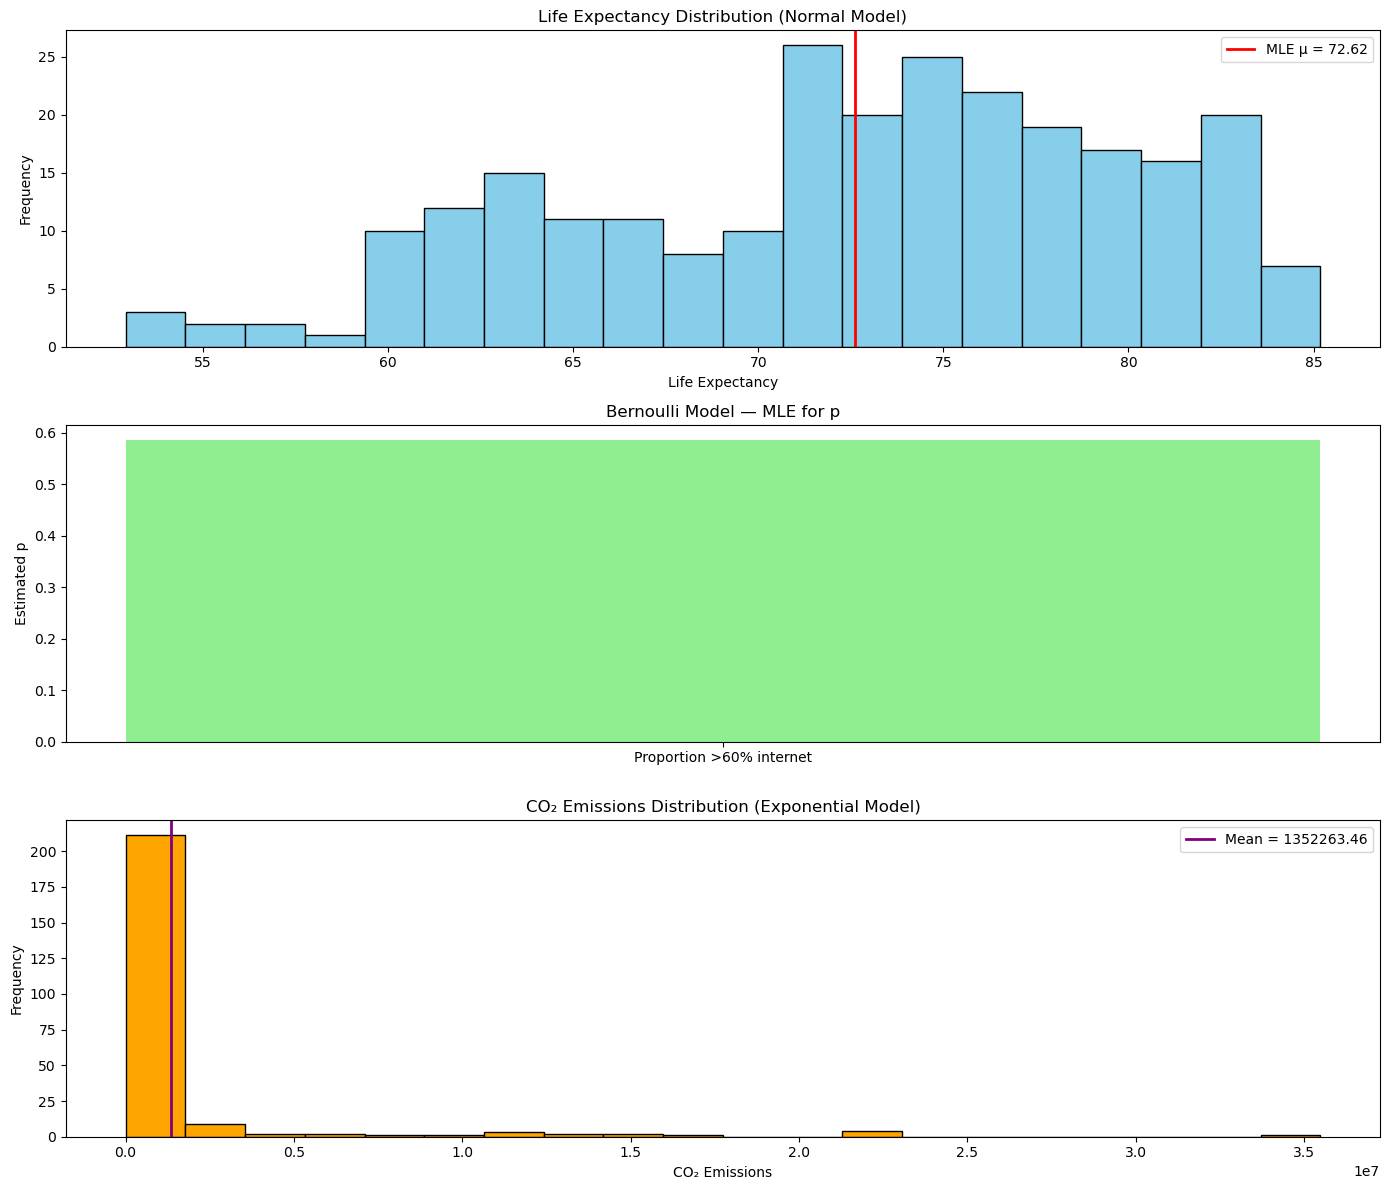

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv("../data/world_bank_development_indicators.csv")  

df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["year"] = df["date"].dt.year

df_year = df[df["year"] == 2019]


life = df_year["life_expectancy_at_birth"].dropna()
internet = df_year["individuals_using_internet%"].dropna()
co2 = df_year["CO2_emisions"].dropna()

indicator = (internet > 60).astype(int)


mle_mu = life.mean()                 # MLE for μ (Normal)
mle_p = indicator.mean()             # MLE for p (Bernoulli)
mle_lambda = 1 / co2.mean()          # MLE for λ (Exponential)

print("MLE μ (Normal) =", mle_mu)
print("MLE p (Bernoulli) =", mle_p)
print("MLE λ (Exponential) =", mle_lambda)



plt.figure(figsize=(14, 12))

# ----- Plot 1: Life Expectancy (Normal MLE = mean) -----
plt.subplot(3, 1, 1)
plt.hist(life, bins=20, color="skyblue", edgecolor="black")
plt.axvline(mle_mu, color="red", linewidth=2, label=f"MLE μ = {mle_mu:.2f}")
plt.title("Life Expectancy Distribution (Normal Model)")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.legend()

# ----- Plot 2: Internet Usage Proportion (Bernoulli) -----
plt.subplot(3, 1, 2)
plt.bar(["Proportion >60% internet"], [mle_p], color="lightgreen")
plt.title("Bernoulli Model — MLE for p")
plt.ylabel("Estimated p")

# ----- Plot 3: CO₂ Emissions (Exponential) -----
plt.subplot(3, 1, 3)
plt.hist(co2, bins=20, color="orange", edgecolor="black")
plt.axvline(1 / mle_lambda, color="purple", linewidth=2,
            label=f"Mean = {co2.mean():.2f}")
plt.title("CO₂ Emissions Distribution (Exponential Model)")
plt.xlabel("CO₂ Emissions")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()
#notsureifiunderstoodthisright,butyaadrewthegraphsanywaystovisualizetheMLEs